## 1. prepare data

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df1_path = "../dataset/titanic_dataset.csv"
df2_path = "../dataset/titanic_answer.csv"

df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)
df = df1.append(df2)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [4]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 392
Data columns (total 8 columns):
survived    1044 non-null int64
pclass      1044 non-null int64
sex         1044 non-null object
age         1044 non-null float64
sibsp       1044 non-null int64
parch       1044 non-null int64
fare        1044 non-null float64
embarked    1044 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 73.4+ KB


In [7]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

-----

## 2. encoding & split dataset

In [8]:
categorical_columns = ['pclass', 'sex', 'embarked']
df = pd.get_dummies(df, columns=categorical_columns)
df.head()

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,13.0,0,1,19.5000,0,1,0,1,0,0,0,1
1,1,4.0,1,1,23.0000,0,1,0,1,0,0,0,1
2,1,30.0,1,0,13.8583,0,1,0,1,0,1,0,0
4,1,22.0,0,0,7.7250,0,0,1,1,0,0,1,0
6,1,30.0,0,0,56.9292,1,0,0,1,0,1,0,0


In [9]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [10]:
train_X = train_df.loc[:, train_df.columns != 'survived'].values
test_X = test_df.loc[:, test_df.columns != 'survived'].values
train_y = train_df['survived'].values
test_y = test_df['survived'].values

-----

## 3. Random forest classifier feature importance

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(train_X, train_y)
pred_y = clf.predict(test_X)
print(roc_auc_score(test_y, pred_y))

0.7505515719801433


In [14]:
final_features = ['age', 'sibsp', 'parch', 'fare', 'pclass_1', 'pclass_2', 'pclass_3', 
                  'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']
for importance, feature in zip(clf.feature_importances_, final_features):
    print(feature + " : " + str(importance))

age : 0.025766439237639195
sibsp : 0.018832657819357626
parch : 0.014225272576486496
fare : 0.07144616393346992
pclass_1 : 0.0863317541337849
pclass_2 : 0.006338043698939358
pclass_3 : 0.09469152719464485
sex_female : 0.38176698580239526
sex_male : 0.25652681132241967
embarked_C : 0.02582061064539633
embarked_Q : 0.002828540081668214
embarked_S : 0.015425193553798185


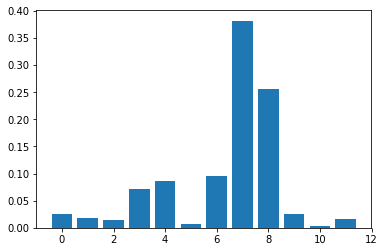

In [15]:
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

-----

## 3. XGB classifier feature importance

0.7673745173745173


/anaconda3/envs/gsshop/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


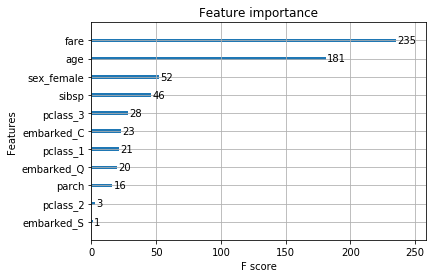

In [18]:
from xgboost import XGBClassifier
from xgboost import plot_importance

clf = XGBClassifier()
clf.fit(train_df.loc[:, train_df.columns != 'survived'], train_df['survived'])
pred_y = clf.predict(test_df.loc[:, test_df.columns != 'survived'])
print(roc_auc_score(test_y, pred_y))

plot_importance(clf)
plt.show()